<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Wavelet_Haar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install PyWavelets --quiet
import pywt
print("PyWavelets version:", pywt.__version__)

PyWavelets version: 1.8.0


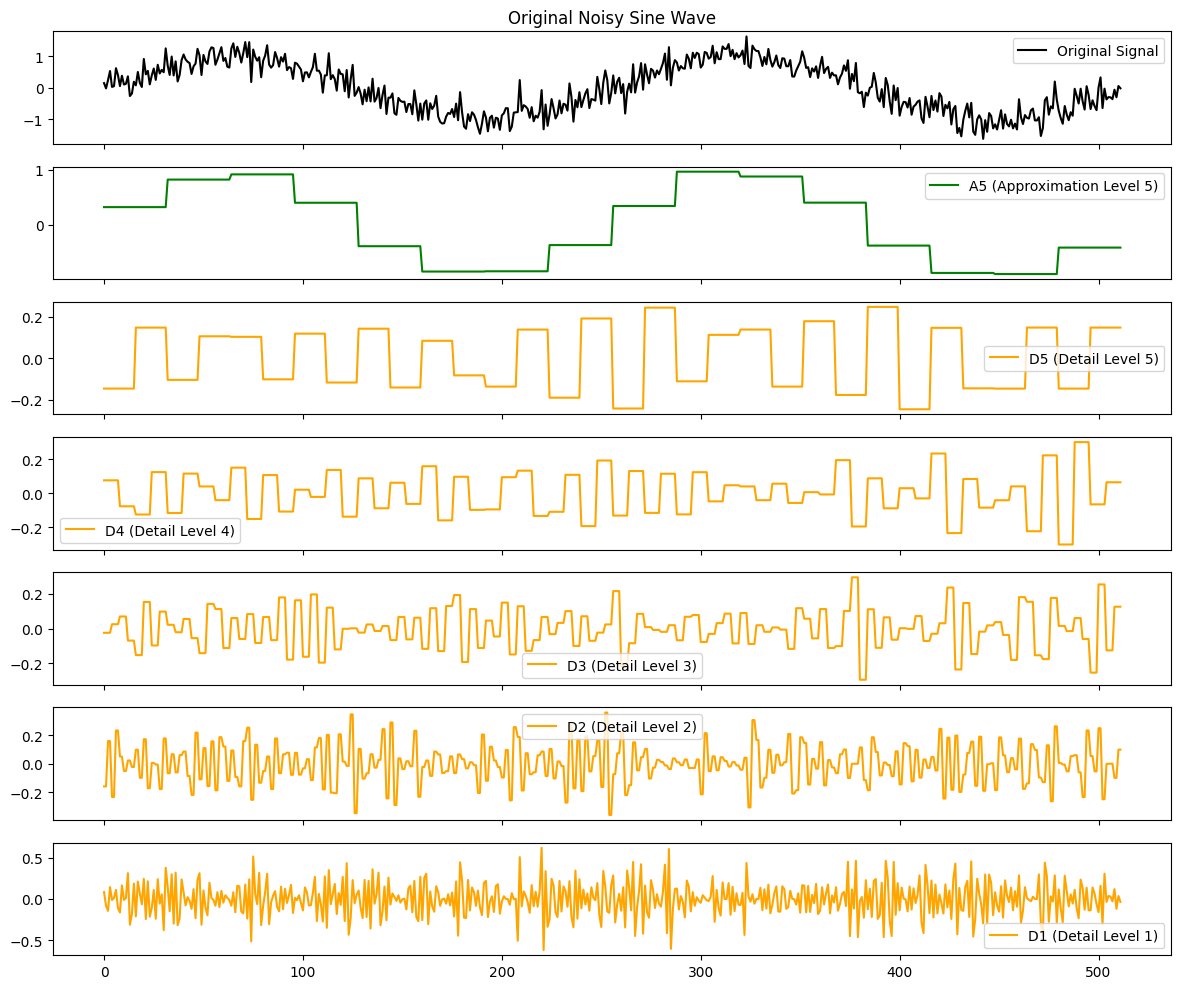

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# 1. Generate a noisy sine wave signal
np.random.seed(42)
x = np.linspace(0, 4 * np.pi, 512)
signal = np.sin(x) + 0.3 * np.random.randn(len(x))  # noisy sine wave

# 2. Perform 5-level wavelet decomposition using Haar wavelet
wavelet = 'haar'
level = 5
coeffs = pywt.wavedec(signal, wavelet, level=level)

# coeffs = [A5, D5, D4, D3, D2, D1]
approx = coeffs[0]       # A5
details = coeffs[1:]     # D5 to D1

# 3. Plot the original and decomposed components
fig, axes = plt.subplots(level + 2, 1, figsize=(12, 10), sharex=True)
axes[0].plot(signal, label='Original Signal', color='black')
axes[0].set_title("Original Noisy Sine Wave")
axes[0].legend()

# Reconstruct and plot A5 (approximation)
A5_rec = pywt.upcoef('a', approx, wavelet, level=level, take=len(signal))
axes[1].plot(A5_rec, label='A5 (Approximation Level 5)', color='green')
axes[1].legend()

# Reconstruct and plot D5–D1 (details)
for i, d in enumerate(details):
    D_rec = pywt.upcoef('d', d, wavelet, level=level - i, take=len(signal))
    axes[i + 2].plot(D_rec, label=f'D{level - i} (Detail Level {level - i})', color='orange')
    axes[i + 2].legend()

plt.tight_layout()
plt.show()
